In [1]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
#from gensim.models.coherencemodel import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt


1. Data Preprocessing

In [4]:
## for Sklearn LDA
IdtoWord = {}
WordtoId = {}
vocab = set()
with open("DataPreprocess/wordToIDtoy.txt") as f:
    for line in f:
        line = line.split()
        IdtoWord[int(line[1])] = line[0]
        WordtoId[line[0]] = int(line[1])
        vocab.add(line[0])
    
D = 50
V = len(vocab)
doc_word_matrix = np.zeros(shape = (D, V), dtype = np.int64)

In [5]:
txt_files = glob.glob("DataPreprocess/nipstxt/nipstoy/short*.txt")

gensim_texts = [] ## for gensim
count = 0 #count number of documents
for file in (txt_files):
    with open(file, 'rt', encoding="ISO-8859-1") as f:
        words_j = f.readline().split()
        gensim_texts.append(words_j)
        for words_ij in words_j:
            col_index = WordtoId[words_ij]
            doc_word_matrix[count][col_index]+=1
        count += 1

In [53]:
txt_files2 = glob.glob("DataPreprocess/nipstxt/nips12/clean_*.txt")

gensim_texts_whole = []
for file in (txt_files2):
    with open(file, 'rt', encoding="ISO-8859-1") as f:
        words_j = f.readline().split()
        gensim_texts_whole.append(words_j)

print (len(gensim_texts_whole))

150


2. Gensim LDA

In [7]:
### Gensim LDA
id2word = corpora.Dictionary(gensim_texts)
texts = gensim_texts 
corpus = [id2word.doc2bow(text) for text in texts] #list of list of word counts
lda_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) 

In [49]:
len(corpus[1])-len(tets[1])

-9

In [8]:
pprint(lda_gensim.print_topics())
doc_lda = lda_gensim[corpus]

[(0,
  '0.016*"solution" + 0.014*"tasks" + 0.014*"models" + 0.012*"abstract" + '
  '0.012*"network" + 0.012*"computational" + 0.009*"neural" + 0.009*"show" + '
  '0.007*"support" + 0.007*"model"'),
 (1,
  '0.018*"winner" + 0.018*"take" + 0.012*"unit" + 0.012*"variables" + '
  '0.011*"neural" + 0.011*"input" + 0.011*"learning" + 0.011*"abstract" + '
  '0.011*"show" + 0.008*"computational"'),
 (2,
  '0.015*"system" + 0.012*"attention" + 0.012*"visual" + 0.010*"abstract" + '
  '0.007*"neural" + 0.007*"neurons" + 0.007*"population" + 0.007*"search" + '
  '0.007*"teacher" + 0.007*"coupled"'),
 (3,
  '0.016*"learning" + 0.010*"abstract" + 0.010*"information" + 0.009*"lights" '
  '+ 0.009*"ion" + 0.008*"language" + 0.008*"ep" + 0.008*"results" + '
  '0.008*"vr" + 0.008*"also"'),
 (4,
  '0.016*"data" + 0.014*"potential" + 0.014*"algorithms" + 0.011*"abstract" + '
  '0.008*"learning" + 0.008*"results" + 0.008*"new" + 0.008*"algorithm" + '
  '0.008*"used" + 0.008*"mean"'),
 (5,
  '0.028*"decodin

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_gensim.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_cv = CoherenceModel(model=lda_gensim, texts=gensim_texts, dictionary=id2word, coherence='c_v')
coherence_model_lda_pmi = CoherenceModel(model=lda_gensim, texts=gensim_texts, dictionary=id2word, coherence='c_npmi')

coherence_cv = coherence_model_lda_cv.get_coherence()
coherence_pmi = coherence_model_lda_pmi.get_coherence()
print('\nCoherence Score (cv): ', coherence_lda)
print('\nCoherence Score (pmi): ', coherence_pmi)



Perplexity:  -7.253507455613646

Coherence Score (cv):  0.34222290050941073

Coherence Score (pmi):  -0.2700261350482476


3. Sklearn LDA

In [10]:
## Sklearn LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(doc_word_matrix)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [11]:
## get top 15 words per topic
id_topic = lda_model.fit_transform(doc_word_matrix)
topic_words = {}
n_top_words = 15

for topic, beta in enumerate(lda_model.components_):
    word_idx = np.argsort(beta)[::-1][:n_top_words]
    topic_words['topic: '+str(topic)] = [IdtoWord[i] for i in word_idx]

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [12]:
for key,value in topic_words.items():
    print (key)
    for word in value:
        print (word)

topic: 0
system
abstract
lights
visual
attention
results
vr
ep
mean
field
neural
decision
tree
boosting
stop
topic: 1
learning
abstract
model
neurons
information
capacity
show
neuron
input
networks
may
network
synapses
spatial
synaptic
topic: 2
language
solution
abstract
languages
support
recognition
class
acquisition
bounds
functions
generalization
show
uniqueness
bound
size
topic: 3
processing
abstract
potential
variability
visual
convex
hulls
new
two
stages
time
algorithm
learning
algorithms
response
topic: 4
decoding
model
noise
umli
neural
channels
voltage
channel
law
also
correlation
abstract
stochastic
neuronal
computational
topic: 5
neurons
neuron
hulls
convex
layer
choice
morphology
input
output
distance
balancing
geometric
biased
control
recognition
topic: 6
model
support
abstract
machines
vector
data
svm
also
show
noise
resonance
using
learning
delay
error
topic: 7
winner
take
computational
input
unit
neural
variables
function
models
abstract
show
likelihood
maass
continuous

In [29]:
topics = []
for key,value in topic_words.items():
    topics.append(value)
cm = CoherenceModel(topics=topics, corpus=corpus,texts=gensim_texts, dictionary=id2word, coherence='c_npmi')
coherence = cm.get_coherence()  # get coherence value
print ("pmi of sklearn model is %f"%coherence)

pmi of sklearn model is -0.235190


4. Find the number of topic k

In [15]:
mallet_path = '/Users/yiranwang/mallet-2.0.8/bin/mallet'

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, \
                                                        texts=gensim_texts, start=3, limit=25, step=3)

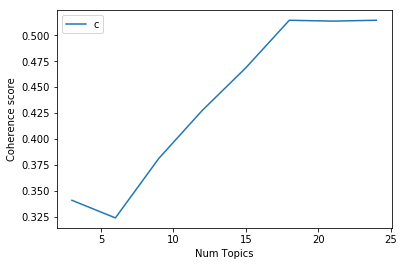

In [32]:
# Show graph
limit=25; start=3; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [58]:
-2**4

-16

In [128]:
class Solution(object):
    def myAtoi(self, str):
        """
        :type str: str
        :rtype: int
        """
        if not str:
            return 0
        res = ''
        expand = False
        noexpand = False
        numbers = "1234567890"    
        for i in range(len(str)):
            if noexpand== False and str[i] == ' ':
                expand = False
                continue
            else:
                expand = True
            if expand:
                noexpand = True
                if str[i] == '-' and i+1 < len(str):
                    if str[i+1] in numbers:
                        res += str[i]
                    else:
                        break
                elif str[i] == '+' and i+1 < len(str):
                    if str[i+1] in numbers:
                        expand = True
                    else:
                        break 
                elif str[i] in numbers:
                    res += str[i]
                else:
                    break
        try:
            if int(res) < -2**31:
                return -2**31
            elif int(res) > 2**31:
                 return 2**31
            else:
                return int(res)
        except:
            return 0

In [129]:
test = Solution()
test.myAtoi("+0 123")

0

In [113]:
" " in "1234567890"   


False

In [106]:
"1" in "0123456789"

True

In [132]:
"    -123  23".strip()

'-123  23'